








## 5. Análise de Feedbacks Positivos vs. Negativos
**Objetivo**: Separar e analisar os feedbacks positivos e negativos.  
**Como fazer**: Filtrar os dados pela coluna **Sentiment Label** (onde 1 é positivo e 0 é negativo). Em seguida, analisar as avaliações separadamente para ver se há padrões diferentes entre elas (por exemplo, o que é mais elogiado em feedbacks positivos e o que é mais criticado em negativos).




## 10. Geração de Relatórios
**Objetivo**: Criar relatórios gerenciais para a administração do hospital com base nas avaliações.  
**Como fazer**: Você pode agrupar as avaliações por sentimentos, calcular a média das **Ratings** e criar um relatório que ajude os gestores a identificar pontos fortes e fracos do hospital.


In [183]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud

In [184]:
df = pd.read_csv('data/hospital_ptbr.csv')
df.head()

,Sentiment Label,Ratings,Feedback_PT
0,1,5,Hospital bom e limpo. Há uma ótima equipe de m...
1,1,5,Tive uma experiência muito ruim durante a alta...
2,1,4,Eu visitei para tomar minha segunda dose e pro...
3,1,3,Essa pessoa não tinha noção e ofereceu apenas ...
4,0,1,Há uma ótima equipe de médicos e boa instalaçã...


In [185]:
# from deep_translator import GoogleTranslator
# import pandas as pd


# # Traduzir os feedbacks
# def translate_feedback(text):
#     try:
#         return GoogleTranslator(source='en', target='pt').translate(text)
#     except Exception as e:
#         print(f"Erro ao traduzir: {text} | Erro: {e}")
#         return None  # Retorna None caso ocorra erro

# df['Feedback_PT'] = df['Feedback'].apply(translate_feedback)

In [186]:
# '''exclui coluna unnnamed e feedback'''
# df = df.drop(['Feedback', 'Unnamed: 3'], axis = 1)

In [187]:
df.head()

,Sentiment Label,Ratings,Feedback_PT
0,1,5,Hospital bom e limpo. Há uma ótima equipe de m...
1,1,5,Tive uma experiência muito ruim durante a alta...
2,1,4,Eu visitei para tomar minha segunda dose e pro...
3,1,3,Essa pessoa não tinha noção e ofereceu apenas ...
4,0,1,Há uma ótima equipe de médicos e boa instalaçã...


In [188]:
# df.to_csv('hospital_ptbr.csv', index = False)

## 1. Análise de Sentimentos
**Objetivo**: Identificar como os pacientes se sentem em relação ao hospital (positivos, negativos ou neutros).  


In [189]:
import plotly.express as px

sentiment_counts = df['Sentiment Label'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment Label', 'Count']

# Criar gráfico de pizza com um efeito 3D simulado
fig = px.pie(sentiment_counts, names='Sentiment Label', values='Count', title="Distribuição dos Sentimentos", 
             hole = 0.4)
fig.update_traces(pull=[0.03, 0.03, 0.03, 0.03])  # Ajuste para destacar as fatias

fig.show()

## 2. Distribuição das Avaliações (Ratings)
**Objetivo**: Verificar como as notas (Ratings) são distribuídas e se há padrões de classificação.  


In [190]:
df['Ratings'].value_counts()

Ratings
5    351
4    254
2    145
3    123
1    123
Name: count, dtype: int64

In [191]:
ratings = df['Ratings'].value_counts().reset_index()
ratings.columns = ['ratings', 'count']

fig = px.bar(ratings, 
             x = 'ratings', 
             y = 'count', 
             text = 'count'
             )
fig.show()

In [192]:
import plotly.graph_objects as go

# Definindo categorias para o gráfico de cascata (positivo ou negativo)
df['Sentiment'] = df['Sentiment Label'].apply(lambda x: 'Positivo' if x == 1 else 'Negativo')

# Contagem da distribuição das avaliações
sentiment_count = df.groupby(['Sentiment', 'Ratings']).size().reset_index(name='Count')

# Ordenando as contagens pelas avaliações (Ratings) e pela contagem
sentiment_count = sentiment_count.sort_values(by=['Count', 'Ratings'], ascending=[False, True])


# Definindo a lista de categorias e os valores
categories = sentiment_count['Ratings'].astype(str)
values = sentiment_count['Count']

# Criando o gráfico de cascata
fig = go.Figure(go.Waterfall(
    x=categories,
    y=values,
    text=values,
    textposition="inside",
    hoverinfo="x+y+text",
    orientation="v", 
    increasing=dict(marker=dict(color='#EC407A')),
))

fig.update_layout(
    title="Distribuição das Avaliações por Sentimento e Classificação",
    showlegend=False, 
    plot_bgcolor='rgba(0,0,0,0)', 
    paper_bgcolor='rgba(0,0,0,0)', 
    yaxis=dict(
        showgrid=True,  
        zeroline=True,  
        showline=True, 
        showticklabels=False,   
        title='Contagem', 
        title_font=dict(color='brown'), 
        linecolor='brown',  
        linewidth=2,
        gridcolor='brown', 
        griddash='dot', 
        gridwidth=1,
    ), 
    xaxis=dict(
        zeroline=False,  
        visible=True,
        showline=True,
        linecolor='brown',  # Define a linha marrom corretamente
        linewidth=2,
        title='Avaliações', 
        title_font=dict(color='brown'), 
        tickfont=dict(color='brown'),
        tickcolor='blue', 
        tickwidth=2,
        ticklen=2,
        zerolinecolor='red',
        # ticks="outside", 
    )
)


fig.show()

## 3. Correlação entre Sentimento e Notas
**Objetivo**: Analisar se as notas altas estão associadas a sentimentos positivos e se as notas baixas estão associadas a sentimentos negativos.  
*

In [193]:
df_grouped = df.groupby("Sentiment Label")["Ratings"].value_counts().reset_index(name="count")
df_grouped.sort_values(by = 'count', ascending = False)

,Sentiment Label,Ratings,count
2,1,5,351
3,1,4,254
0,0,2,145
1,0,1,123
4,1,3,123


In [194]:
import plotly.graph_objects as go

# Contagem das ocorrências de Ratings para cada Sentiment Label
df_grouped = df.groupby("Sentiment Label")["Ratings"].value_counts().reset_index(name="count")

# Criando o gráfico de barras
fig = go.Figure()

# Adicionando os traços para cada Rating
ratings = df_grouped['Ratings'].unique()
for rating in ratings:
    df_rating = df_grouped[df_grouped['Ratings'] == rating]
    fig.add_trace(go.Bar(
        x=df_rating['Sentiment Label'],  # Sentimento
        y=df_rating['count'],  # Contagem das notas
        name=f"{rating}",  # Nome da legenda
        marker=dict(color=f'rgba({rating * 50}, {255 - rating * 50}, 180, 20.16)'),  # Cor para cada rating
        text=df_rating['count'],  # Corrigindo para que o 'text' seja a contagem do rating atual
        textposition='inside',  # Colocando os valores dentro da barra
        insidetextanchor='middle',  # Centralizando o texto dentro das barras

    ))

# Ajustando o layout para exibir as barras corretamente
fig.update_layout(
    title="Distribuição de Notas por Sentimento",
    xaxis_title="Sentimento",
    yaxis_title="Quantidade de Notas",
    barmode="stack",  # Empilhamento das barras
    legend=dict(
        traceorder='normal',
        itemsizing='constant',  # Mantém o tamanho consistente na legenda
        title="Ratings"
    ),
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],  # Exibe apenas os valores 0 e 1 no eixo X
        ticktext=['negativos', 'posititivos']  # Personalização dos rótulos no eixo X
    ),
    yaxis=dict(
         showgrid=False,  # Remove a grade (linhas horizontais)
        zeroline=False,  # Remove a linha do zero
        showticklabels=False  # Remove os rótulos d
    )
)

# Exibindo o gráfico
fig.show()


In [195]:
# import plotly.graph_objects as go


# DF = df
# # Ajustando o Sentiment Label com base nas Ratings
# # As avaliações 4 e 5 são positivas, a 3 é neutra, e as outras são negativas
# DF['Sentiment Label'] = DF['Ratings'].apply(
#     lambda x: 'positivo' if x in [4, 5] else ('neutro' if x == 3 else 'negativo')
# )

# # Contagem das ocorrências de Ratings para cada Sentiment Label
# DF_grouped = DF.groupby("Sentiment Label")["Ratings"].value_counts().reset_index(name="count")

# # Criando o gráfico de barras
# fig = go.Figure()

# # Adicionando os traços para cada Rating
# ratings = DF_grouped['Ratings'].unique()
# for rating in ratings:
#     df_rating = DF_grouped[DF_grouped['Ratings'] == rating]
#     fig.add_trace(go.Bar(
#         x=DF_grouped['Sentiment Label'],  # Sentimento
#         y=DF_grouped['count'],  # Contagem das notas
#         name=f"{rating}",  # Nome da legenda
#         marker=dict(color=f'rgba({rating * 50}, {255 - rating * 50}, 100, 0.6)'),  # Cor para cada rating
#         text=DF_grouped['count'],  # Corrigindo para que o 'text' seja a contagem do rating atual
#         textposition='inside',  # Colocando os valores dentro da barra
#         insidetextanchor='middle',  # Centralizando o texto dentro das barras
#     ))

# # Ajustando o layout para exibir as barras corretamente
# fig.update_layout(
#     title="Distribuição de Notas por Sentimento",
#     xaxis_title="Sentimento",
#     yaxis_title="Quantidade de Notas",
#     barmode="stack",  # Empilhamento das barras
#     legend=dict(
#         traceorder='normal',
#         itemsizing='constant',  # Mantém o tamanho consistente na legenda
#         title="Ratings",
#     ),
#     xaxis=dict(
#         tickmode='array',
#         tickvals=[0, 1, 2],  # Exibe os valores 0, 1 e 2 no eixo X
#         ticktext=['negativos', 'neutros', 'positivos']  # Personalização dos rótulos no eixo X
#     ),
#     yaxis=dict(
#          showgrid=False,  # Remove a grade (linhas horizontais)
#         zeroline=False,  # Remove a linha do zero
#         showticklabels=False  # Remove os rótulos do eixo Y
#     ), 
    
# )

# # Exibindo o gráfico
# fig.show()


## 4. Nuvem de Palavras (Word Cloud)
**Objetivo**: Verificar quais palavras são mais comuns nos feedbacks dos pacientes.

In [196]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

# Filtra os feedbacks positivos e negativos
df_pos = df[df["Sentiment Label"] == 1]["Feedback_PT"]
df_neg = df[df["Sentiment Label"] == 0]["Feedback_PT"]

# Lista personalizada de stopwords
stopwords_personalizadas = set(STOPWORDS)
stopwords_personalizadas.update(["de", "ou", "o", "as", "para", "há", "um", "uma", "dos", "das", 
                                  "com", "que", "ele", "como", "da", "é", "nos", "aos", "mais", "muito", "seu", 
                                  "sua", "já", "ter", "ser", "vai", "está", "são", "não", "sim", 'os', 'eu', 'por', 
                                  'eles', 'e', 'em', 'ao', 'se'])

# Função para gerar nuvem de palavras
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
                        width=1000,  # Largura fixa
                        height=400,  # Altura fixa
                        background_color="black",  # Fundo transparente
                        stopwords=stopwords_personalizadas, 
                        colormap="plasma", 
                        max_words=140,  
                        min_font_size=15,  
                        max_font_size=250, 
                        contour_color='red',  
                        contour_width=0
                        ).generate(" ".join(text))

    # Converter a wordcloud em imagem
    wordcloud_image = wordcloud.to_image().convert("RGB")
    
    # Convertendo a imagem para um formato que o Plotly possa exibir
    fig = px.imshow(np.array(wordcloud_image), title=title)
    fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
    fig.update_layout(
        autosize=True,  # Faz o gráfico ocupar toda a largura do container no Dash
        height=400,  # Mantém altura fixa
        margin=dict(l=0, r=0, t=0, b=0),  # Zerar todas as margens
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        plot_bgcolor='rgba(0,0,0,0)',  # Fundo transparente
        paper_bgcolor='rgba(0,0,0,0)',  # Fundo do papel transparente
    )
    fig.show()

# Gerar nuvem de palavras para feedbacks positivos
generate_wordcloud(df_pos, "Nuvem de Palavras - Feedbacks Positivos")

# Gerar nuvem de palavras para feedbacks negativos
generate_wordcloud(df_neg, "Nuvem de Palavras - Feedbacks Negativos")


In [197]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

# Filtra os feedbacks positivos e negativos
df_pos = df[df["Sentiment Label"] == 1]["Feedback_PT"]
df_neg = df[df["Sentiment Label"] == 0]["Feedback_PT"]

# Lista personalizada de stopwords
stopwords_personalizadas = set(STOPWORDS)
stopwords_personalizadas.update(["de", "ou", "o", "as", "para", "há", "um", "uma", "dos", "das", 
                                  "com", "que", "ele", "como", "da", "é", "nos", "aos", "mais", "muito", "seu", 
                                  "sua", "já", "ter", "ser", "vai", "está", "são", "não", "sim", 'os', 'eu', 'por', 
                                  'eles', 'e', 'em', 'ao', 'se'])

# Carrega a imagem da nuvem e converte para escala de cinza
nuvem_mask = np.array(Image.open('assets/nuvem3.webp').convert('L'))

# Normaliza a máscara para garantir que ela tenha apenas valores binários
nuvem_mask[nuvem_mask > 200] = 255  # Define o limite superior para a área onde as palavras podem aparecer (branco)
nuvem_mask[nuvem_mask <= 200] = 0  # Define o limite inferior para o fundo (preto)

# Função para gerar nuvem de palavras com máscara
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
                        width=1000,  # Largura fixa
                        height=400,  # Altura fixa
                        background_color="black",  # Fundo transparente
                        stopwords=stopwords_personalizadas, 
                        colormap="plasma", 
                        max_words=140,  
                        min_font_size=15,  
                        max_font_size=250, 
                        contour_width=5,
                        mask=nuvem_mask,  # Aplica a máscara da nuvem
                        contour_color="gray",  # Contorno da nuvem (preto)
                        mode="RGB"  # Modo de cor RGB para suportar o contorno e a imagem
                        ).generate(" ".join(text))

    # Converter a wordcloud em imagem
    wordcloud_image = wordcloud.to_image()
    
    # Convertendo a imagem para um formato que o Plotly possa exibir
    fig = px.imshow(np.array(wordcloud_image), title=title)
    fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
    fig.update_layout(
        autosize=True,  # Faz o gráfico ocupar toda a largura do container no Dash
        height=400,  # Mantém altura fixa
        margin=dict(l=0, r=0, t=0, b=0),  # Zerar todas as margens
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        plot_bgcolor='rgba(0,0,0,0)',  # Fundo transparente
        paper_bgcolor='rgba(0,0,0,0)',  # Fundo do papel transparente
    )
    fig.show()

# Gerar nuvem de palavras para feedbacks positivos
generate_wordcloud(df_pos, "Nuvem de Palavras - Feedbacks Positivos")

# Gerar nuvem de palavras para feedbacks negativos
generate_wordcloud(df_neg, "Nuvem de Palavras - Feedbacks Negativos")


In [198]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

# Carregar a imagem como máscara
mask = np.array(Image.open("assets/nuvem6.png").convert("L"))

# Transformar em uma máscara binária (0 para áreas vazias, 255 para preenchidas)
mask = np.where(mask > 128, 255, 0)

# Filtra os feedbacks positivos e negativos
df_pos = df[df["Sentiment Label"] == 1]["Feedback_PT"]
df_neg = df[df["Sentiment Label"] == 0]["Feedback_PT"]

# Lista personalizada de stopwords
stopwords_personalizadas = set(STOPWORDS)
stopwords_personalizadas.update(["de", "ou", "o", "as", "para", "há", 
                                 "um", "uma", "dos","das", "com", "que", 
                                 "ele", "como", "da", "é", "nos", "aos", 
                                 "mais", "", "seu","sua", "já", "ter", "ser", 
                                 "vai", "está", "são", "", "sim", 'os', 'eu', 
                                 'por','eles', 'e', 'em', 'ao', 'se'
                                  ])

# Função para gerar nuvem de palavras com máscara
def generate_wordcloud(text):
    wordcloud = WordCloud(
        width=1500,  # Aumentar a largura
        height=800,  # Aumentar a altura
        background_color="#303030",
        stopwords=stopwords_personalizadas,
        colormap="plasma",
        max_words=200,
        min_font_size=15,
        max_font_size=250,
        contour_color='blue',
        contour_width=3,
        mask=mask  # Adiciona a máscara da imagem
    ).generate(" ".join(text))

    # Converter a wordcloud em imagem
    wordcloud_image = wordcloud.to_image()
    
    # Convertendo a imagem para um formato que o Plotly possa exibir
    fig = px.imshow(np.array(wordcloud_image))
    fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
    fig.update_layout(
        autosize=True,
        height=250,
        margin=dict(l=0, r=0, t=0, b=0),  # Zerar todas as margens
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
    )
    fig.show()

# Gerar nuvem de palavras para feedbacks positivos
generate_wordcloud(df_pos)

# Gerar nuvem de palavras para feedbacks negativos
generate_wordcloud(df_neg)


## 5. Análise de Temas em Feedbacks
**Objetivo**: Identificar se há diferentes temas nas avaliações (por exemplo, qualidade do atendimento, limpeza, atendimento médico).  
**Como fazer**: Se houver mais dados sobre categorias (por exemplo, atendimento médico, infraestrutura), você poderia tentar usar **técnicas de NLP** para categorizar as avaliações em diferentes temas.

In [199]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')



# Separar os dados por Sentiment Label
positive_reviews = df[df['Sentiment Label'] == 1]
negative_reviews = df[df['Sentiment Label'] == 0]

# Função para pré-processamento dos textos
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()
    # Remover stopwords
    stop_words = set(stopwords.words('portuguese'))
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

# Aplicar o pré-processamento nas avaliações
positive_reviews['cleaned_feedback'] = positive_reviews['Feedback_PT'].apply(preprocess_text)
negative_reviews['cleaned_feedback'] = negative_reviews['Feedback_PT'].apply(preprocess_text)

# Extrair as palavras mais frequentes usando TF-IDF
vectorizer = TfidfVectorizer(max_features=10)

# Analisar palavras mais frequentes nas avaliações positivas
positive_tfidf = vectorizer.fit_transform(positive_reviews['cleaned_feedback'])
positive_words = vectorizer.get_feature_names_out()

# Analisar palavras mais frequentes nas avaliações negativas
negative_tfidf = vectorizer.fit_transform(negative_reviews['cleaned_feedback'])
negative_words = vectorizer.get_feature_names_out()

# Exibir os resultados
print("Palavras mais comuns nas avaliações positivas:", positive_words)
print("Palavras mais comuns nas avaliações negativas:", negative_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/black_d/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Palavras mais comuns nas avaliações positivas: ['bem' 'boa' 'bom' 'dr' 'equipe' 'experiência' 'hospital' 'médicos'
 'serviço' 'tratamento']
Palavras mais comuns nas avaliações negativas: ['consulta' 'dinheiro' 'emergência' 'equipe' 'experiência' 'hospital'
 'médico' 'paciente' 'pacientes' 'pior']


/tmp/ipykernel_6289/3784607734.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_6289/3784607734.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [200]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

# Supondo que df já está carregado
# Separar os dados por Sentiment Label
positive_reviews = df[df['Sentiment Label'] == 1]
negative_reviews = df[df['Sentiment Label'] == 0]

# Função para pré-processamento dos textos
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()
    # Remover stopwords
    stop_words = set(stopwords.words('portuguese'))
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

# Aplicar o pré-processamento nas avaliações
positive_reviews['cleaned_feedback'] = positive_reviews['Feedback_PT'].apply(preprocess_text)
negative_reviews['cleaned_feedback'] = negative_reviews['Feedback_PT'].apply(preprocess_text)

# Contar frequência das palavras
def get_most_common_words(text_series, top_n=10):
    all_words = " ".join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

# Obter palavras mais comuns e suas frequências
positive_common_words = get_most_common_words(positive_reviews['cleaned_feedback'])
negative_common_words = get_most_common_words(negative_reviews['cleaned_feedback'])

# Exibir os resultados
print("Palavras mais comuns nas avaliações positivas:")
for word, freq in positive_common_words:
    print(f"{word}: {freq}")

print("\nPalavras mais comuns nas avaliações negativas:")
for word, freq in negative_common_words:
    print(f"{word}: {freq}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/black_d/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_6289/2844063291.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_6289/2844063291.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Palavras mais comuns nas avaliações positivas:
hospital: 208
dr.: 146
equipe: 140
bom: 112
médicos: 108
serviço: 106
tratamento: 101
experiência: 100
bem: 94
todos: 69

Palavras mais comuns nas avaliações negativas:
hospital: 75
pior: 48
paciente: 34
experiência: 33
equipe: 32
médico: 32
pacientes: 26
apenas: 22
médicos: 21
emergência: 21


### Avaliações Positivas:
Nas avaliações positivas, os termos relacionados ao atendimento e aos profissionais de saúde como **equipe**, **médicos** e **tratamento** indicam que o foco está na qualidade do atendimento e no profissionalismo, além de um bom ambiente hospitalar representado pelas palavras **hospital**, **bom** e **boa**.

### Avaliações Negativas:
Nas avaliações negativas, há uma crítica mais forte ao atendimento, com ênfase na **equipe** e no **médico**, mas também há menção a questões relacionadas ao processo de atendimento, como **consulta**, **dinheiro** e **emergência**, sugerindo que problemas administrativos ou financeiros podem ser fontes de insatisfação. Além disso, o termo **pior** indica uma experiência muito negativa em relação a algo esperado, reforçando um sentimento de insatisfação.


## 6. Existe um padrão no tamanho dos comentários para sentimentos positivos e negativos? 
### Feedbacks mais longos ou mais curtos tendem a ter um determinado sentimento?






In [201]:
# Calculando o número de palavras de cada comentário
df['word_count'] = df['Feedback_PT'].apply(lambda x: len(str(x).split()))

# Calculando o número de caracteres de cada comentário
df['char_count'] = df['Feedback_PT'].apply(lambda x: len(str(x)))

# Separando os feedbacks positivos e negativos
positive_feedbacks = df[df["Sentiment Label"] == 1]
negative_feedbacks = df[df["Sentiment Label"] == 0]

# Média do número de palavras
positive_avg_word_count = positive_feedbacks['word_count'].mean()
negative_avg_word_count = negative_feedbacks['word_count'].mean()

# Média do número de caracteres
positive_avg_char_count = positive_feedbacks['char_count'].mean()
negative_avg_char_count = negative_feedbacks['char_count'].mean()

print(f"Média de palavras para feedbacks positivos: {positive_avg_word_count:.0f}")
print(f"Média de palavras para feedbacks negativos: {negative_avg_word_count:.0f}")
print(f"Média de caracteres para feedbacks positivos: {positive_avg_char_count:.0f}")
print(f"Média de caracteres para feedbacks negativos: {negative_avg_char_count:.0f}")


Média de palavras para feedbacks positivos: 21
Média de palavras para feedbacks negativos: 23
Média de caracteres para feedbacks positivos: 125
Média de caracteres para feedbacks negativos: 134


In [202]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Calculando o número de palavras de cada comentário
df['word_count'] = df['Feedback_PT'].apply(lambda x: len(str(x).split()))

# Separando feedbacks positivos e negativos
positive_feedbacks = df[df['Sentiment Label'] == 1]
negative_feedbacks = df[df['Sentiment Label'] == 0]

# Calculando as médias
mean_words_positive = positive_feedbacks['word_count'].mean()
mean_words_negative = negative_feedbacks['word_count'].mean()

# Criando o layout com 1 linha e 2 colunas
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    "Distribuição de Palavras - Feedbacks Positivos",
    "Distribuição de Palavras - Feedbacks Negativos"
])

# Gráfico de palavras para feedbacks positivos
hist_positive = px.histogram(positive_feedbacks, x='word_count', nbins=30, color_discrete_sequence=['green'], 
                             text_auto=True)

# Adicionando ao subplot
fig.add_trace(hist_positive.data[0], row=1, col=1)
fig.add_vline(x=mean_words_positive, line_dash="dash", line_color="black",
              annotation_text=f"Média: {mean_words_positive:.0f}", annotation_position="top right", row=1, col=1)

# Gráfico de palavras para feedbacks negativos
hist_negative = px.histogram(negative_feedbacks, x='word_count', nbins=30, color_discrete_sequence=['red'], 
                             text_auto=True)

# Adicionando ao subplot
fig.add_trace(hist_negative.data[0], row=1, col=2)
fig.add_vline(x=mean_words_negative, line_dash="dash", line_color="black",
              annotation_text=f"Média: {mean_words_negative:.0f}", annotation_position="top right", row=1, col=2)

# Ajustes finais no layout
fig.update_layout(
    width=1005, height=500,
    showlegend=False,
    bargap=0.2,
    plot_bgcolor='rgba(0,0,0,0)',  # Fundo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fundo do papel transparente
    font=dict(color="white"),
    title_x=0.5,
)

# Ajustando apenas a posição dos títulos dos subplots
for annotation in fig.layout.annotations:
    if "Distribuição de Palavras" in annotation.text:  # Verifica se é um título de gráfico
        annotation.yshift = 50  # Move o título para cima

# Removendo as linhas do eixo Y e mantendo apenas as linhas dos eixos X e Y
fig.update_xaxes(title_text="Número de Palavras", showgrid=False, zeroline=True)
fig.update_yaxes(title_text="Frequência", showgrid=False, zeroline=True, showticklabels=False)

# Mostrando o gráfico
fig.show()


In [203]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Supondo que df já está carregado e tem as colunas necessárias
df['word_count'] = df['Feedback_PT'].apply(lambda x: len(str(x).split()))

# Separando feedbacks positivos e negativos
positive_feedbacks = df[df['Sentiment Label'] == 1]
negative_feedbacks = df[df['Sentiment Label'] == 0]

# Calculando as médias
mean_words_positive = positive_feedbacks['word_count'].mean()
mean_words_negative = negative_feedbacks['word_count'].mean()

# Criando o layout com 1 linha e 2 colunas
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    "Distribuição de Palavras - Feedbacks Positivos",
    "Distribuição de Palavras - Feedbacks Negativos"
])

# Gráfico de palavras para feedbacks positivos
hist_positive = px.histogram(positive_feedbacks, x='word_count', nbins=30, color_discrete_sequence=['green'], 
                             text_auto=True)

# Adicionando ao subplot
fig.add_trace(hist_positive.data[0], row=1, col=1)

# Adicionando linha da média para feedbacks positivos
fig.add_shape(
    type="line", x0=mean_words_positive, x1=mean_words_positive, y0=0, y1=1, 
    xref='x1', yref='paper', line=dict(color="black", dash="dash")
)
fig.add_annotation(
    x=mean_words_positive, y=1.05, xref="x1", yref="paper",
    text=f"Média: {mean_words_positive:.0f}", showarrow=False, font=dict(color="black")
)

# Gráfico de palavras para feedbacks negativos
hist_negative = px.histogram(negative_feedbacks, x='word_count', nbins=30, color_discrete_sequence=['red'], 
                             text_auto=True)

# Adicionando ao subplot
fig.add_trace(hist_negative.data[0], row=1, col=2)

# Adicionando linha da média para feedbacks negativos
fig.add_shape(
    type="line", x0=mean_words_negative, x1=mean_words_negative, y0=0, y1=1, 
    xref='x2', yref='paper', line=dict(color="black", dash="dash")
)
fig.add_annotation(
    x=mean_words_negative, y=1.05, xref="x2", yref="paper",
    text=f"Média: {mean_words_negative:.0f}", showarrow=False, font=dict(color="black")
)

# Ajustes finais no layout
fig.update_layout(
    width=1005, height=500,
    showlegend=False,
    bargap=0.2,
    plot_bgcolor='rgba(0,0,0,0)',  # Fundo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fundo do papel transparente
    font=dict(color="white"),
    title_x=0.5,
)

# Ajustando apenas a posição dos títulos dos subplots
for annotation in fig.layout.annotations:
    if "Distribuição de Palavras" in annotation.text:  
        annotation.yshift = 50  

# Removendo as linhas do eixo Y e mantendo apenas as linhas dos eixos X e Y
fig.update_xaxes(title_text="Número de Palavras", showgrid=False, zeroline=True)
fig.update_yaxes(title_text="Frequência", showgrid=False, zeroline=True, showticklabels=False)

# Mostrando o gráfico
fig.show()


In [204]:
import plotly.graph_objects as go
import pandas as pd

# Supondo que df já está carregado e tem as colunas necessárias
df['word_count'] = df['Feedback_PT'].apply(lambda x: len(str(x).split()))

# Separando feedbacks positivos e negativos
positive_feedbacks = df[df['Sentiment Label'] == 1]
negative_feedbacks = df[df['Sentiment Label'] == 0]

# Substituindo o outlier pela mediana
median_negative = negative_feedbacks['word_count'].median()
negative_feedbacks.loc[negative_feedbacks['word_count'] > 100, 'word_count'] = median_negative

# Criando um intervalo de contagem de palavras
positive_counts = positive_feedbacks['word_count'].value_counts().sort_index()
negative_counts = negative_feedbacks['word_count'].value_counts().sort_index()

# Cálculo da média
mean_positive = positive_feedbacks['word_count'].mean()
mean_negative = negative_feedbacks['word_count'].mean()

# Criando a figura
fig = go.Figure()

# Adicionando a linha para feedbacks positivos
fig.add_trace(go.Scatter(x=positive_counts.index, y=positive_counts.values, mode='lines',
                         line=dict(color='green'), name='Positivos', 
                         ))

# Adicionando a linha para feedbacks negativos
fig.add_trace(go.Scatter(x=negative_counts.index, y=negative_counts.values, mode='lines',
                         line=dict(color='red'), name='Negativos',
                         ))

# Ajustes finais no layout
fig.update_layout(
    width=1005, height=500,
    title="Distribuição de Palavras nos Feedbacks",
    xaxis_title="Número de Palavras",
    yaxis_title="Frequência",
    legend_title="Tipo de Feedback",
)

fig.add_annotation(
    text=f"Média Número de Palavras Positivos: {mean_positive:.0f}",
    xref='paper', yref='paper',
    x=0.85, y=0.90,
    font=dict(size=15, color='green'),
    align='center',
    bgcolor='rgba(0, 255, 0, 0.3)',
    showarrow=False
)

fig.add_annotation(
    text=f"Média Número de Palavras Negativos: {mean_negative:.0f}",
    xref='paper', yref='paper',
    x=0.85, y=0.60,
    font=dict(size=15, color='red'),
    align='center',
    bgcolor='rgba(255, 0, 0, 0.3)',
    showarrow=False
)

# Adicionando linha vertical ao passar o mouse
fig.update_layout(
    hovermode='x unified',  # Unificar os dados ao longo do eixo x
)

# Mostrando o gráfico
fig.show()


In [205]:
import plotly.graph_objects as go
import pandas as pd

# Supondo que df já está carregado e tem as colunas necessárias
df['word_count'] = df['Feedback_PT'].apply(lambda x: len(str(x).split()))

# Separando feedbacks positivos e negativos
positive_feedbacks = df[df['Sentiment Label'] == 1]
negative_feedbacks = df[df['Sentiment Label'] == 0]

# Substituindo o outlier pela mediana
median_negative = negative_feedbacks['word_count'].median()
negative_feedbacks.loc[negative_feedbacks['word_count'] > 100, 'word_count'] = median_negative

# Criando um intervalo de contagem de palavras
positive_counts = positive_feedbacks['word_count'].value_counts().sort_index()
negative_counts = negative_feedbacks['word_count'].value_counts().sort_index()

# Cálculo da média
mean_positive = positive_feedbacks['word_count'].mean()
mean_negative = negative_feedbacks['word_count'].mean()

# Criando a figura
fig = go.Figure()

# Adicionando a linha para feedbacks positivos
fig.add_trace(go.Scatter(x=positive_counts.index, y=positive_counts.values, mode='lines',
                         line=dict(color='green'), name='Positivos', fill='tozeroy'))

# Adicionando a linha para feedbacks negativos
fig.add_trace(go.Scatter(x=negative_counts.index, y=negative_counts.values, mode='lines',
                         line=dict(color='red'), name='Negativos', fill='tozeroy'))

# Ajustes finais no layout
fig.update_layout(
    width=1005, height=500,
    title="Distribuição de Palavras nos Feedbacks",
    xaxis_title="Número de Palavras",
    yaxis_title="Frequência",
    legend_title="Tipo de Feedback",
)

# Adicionando anotações com médias
fig.add_annotation(
    text=f"Média Número de Palavras Positivos: {mean_positive:.0f}",
    xref='paper', yref='paper',
    x=0.85, y=0.90,
    font=dict(size=15, color='green'),
    align='center',
    bgcolor='rgba(0, 255, 0, 0.3)',
    showarrow=False
)

fig.add_annotation(
    text=f"Média Número de Palavras Negativos: {mean_negative:.0f}",
    xref='paper', yref='paper',
    x=0.85, y=0.60,
    font=dict(size=15, color='red'),
    align='center',
    bgcolor='rgba(255, 0, 0, 0.3)',
    showarrow=False
)

# Adicionando linha vertical ao passar o mouse
fig.update_layout(
    hovermode='x unified',  # Unificar os dados ao longo do eixo x
)

# Mostrando o gráfico
fig.show()


In [206]:
import plotly.graph_objects as go
import pandas as pd

# Supondo que df já está carregado e tem as colunas necessárias
df['word_count'] = df['Feedback_PT'].apply(lambda x: len(str(x).split()))

# Separando feedbacks positivos e negativos
positive_feedbacks = df[df['Sentiment Label'] == 1]
negative_feedbacks = df[df['Sentiment Label'] == 0]

# Calculando a mediana dos word_count em feedbacks negativos
median_negative = negative_feedbacks['word_count'].median()

# Substituindo o outlier pela mediana
negative_feedbacks.loc[negative_feedbacks['word_count'] > 100, 'word_count'] = median_negative


# Calculando a frequência de word_count
freq_positive = positive_feedbacks['word_count'].value_counts().sort_index()
freq_negative = negative_feedbacks['word_count'].value_counts().sort_index()

fig = go.Figure()

# Adiciona barras das palavras mais frequentes em feedbacks positivos
fig.add_trace(go.Bar(
    x=freq_positive.index,  # Número de palavras
    y=freq_positive.values,  # Frequência das palavras
    name="Positivas",
    marker_color="green"
))

# Adiciona barras das palavras mais frequentes em feedbacks negativos
fig.add_trace(go.Bar(
    x=freq_negative.index,  # Número de palavras
    y=freq_negative.values,  # Frequência das palavras
    name="Negativas",
    marker_color="red"
))

# Configuração do layout
fig.update_layout(
    barmode='group',  # Agrupar as barras
    title="Frequência das palavras mais comuns em avaliações",
    xaxis_title="Número de Palavras",
    yaxis_title="Frequência",
    xaxis_tickangle=-45
)

fig.show()


In [207]:
import plotly.graph_objects as go
import pandas as pd

# Supondo que df já está carregado e tem as colunas necessárias
df['word_count'] = df['Feedback_PT'].apply(lambda x: len(str(x).split()))

# Separando feedbacks positivos e negativos
positive_feedbacks = df[df['Sentiment Label'] == 1]
negative_feedbacks = df[df['Sentiment Label'] == 0]

# Calculando a mediana dos word_count em feedbacks negativos
median_negative = negative_feedbacks['word_count'].median()

# Substituindo o outlier pela mediana
negative_feedbacks.loc[negative_feedbacks['word_count'] > 100, 'word_count'] = median_negative

# Calculando a frequência de word_count
freq_positive = positive_feedbacks['word_count'].value_counts().sort_index()
freq_negative = negative_feedbacks['word_count'].value_counts().sort_index()

# Cálculo da média
mean_positive = positive_feedbacks['word_count'].mean()
mean_negative = negative_feedbacks['word_count'].mean()

fig = go.Figure()

# Adiciona barras das palavras mais frequentes em feedbacks positivos
fig.add_trace(go.Bar(
    x=freq_positive.index,  # Número de palavras
    y=freq_positive.values,  # Frequência das palavras
    name="Positivas",
    marker_color="green"
))

# Adiciona barras das palavras mais frequentes em feedbacks negativos
fig.add_trace(go.Bar(
    x=freq_negative.index,  # Número de palavras
    y=freq_negative.values,  # Frequência das palavras
    name="Negativas",
    marker_color="red"
))

# Configuração do layout
fig.update_layout(
    barmode='group',  # Agrupar as barras
    title="Frequência das palavras mais comuns em avaliações",
    xaxis_title="Número de Palavras",
    yaxis_title="Frequência",
    xaxis_tickangle=-45
)



fig.add_annotation(
    text=f"Média Feedbacks Positivos: {mean_positive:.0f}",
    xref='paper', yref='paper',
    x=0.85, y=0.90,  # Posições ajustadas para o gráfico
    font=dict(size=15, color='green'),
    align='center',
    bgcolor='rgba(0, 255, 0, 0.3)',
    showarrow=False
)


fig.add_annotation(
    text=f"Média Feedbacks Negativos: {mean_negative:.0f}",
    xref='paper', yref='paper',
    x=0.85, y=0.60,  # Posições ajustadas para o gráfico
    font=dict(size=15, color='red'),
    align='center',
    bgcolor='rgba(255, 0, 0, 0.3)',
    showarrow=False
)

fig.show()


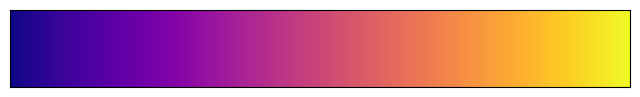

In [208]:
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

# Criar um gradiente de cores da paleta Plasma
colorscale = px.colors.sequential.Plasma

# Exibir a paleta
fig, ax = plt.subplots(figsize=(8, 1))
gradient = np.linspace(0, 1, 256).reshape(1, -1)
ax.imshow(gradient, aspect='auto', cmap="plasma")
ax.set_xticks([])
ax.set_yticks([])
plt.show()


In [209]:
import plotly.graph_objects as go

# Dados de exemplo para o gráfico
x = ['Atendimento', 'Profissionais de Saúde', 'Ambiente Hospitalar']
y = [10, 15, 5]

# Criando o gráfico
fig = go.Figure()

fig.add_trace(go.Bar(
    x=x,
    y=y,
    marker_color='blue'
))

# Adicionando título e rótulos aos eixos
fig.update_layout(
    title='Análise das Avaliações Positivas',
    xaxis_title='Categorias',
    yaxis_title='Frequência',
    annotations=[
        dict(
            text='Nas avaliações positivas, os termos relacionados ao atendimento e aos profissionais de saúde como <b>equipe</b>, <b>médicos</b> e <b>tratamento</b> indicam que o foco está na qualidade do atendimento e no profissionalismo, além de um bom ambiente hospitalar representado pelas palavras <b>hospital</b>, <b>bom</b> e <b>boa</b>.',
            xref='paper', yref='paper',
            x=0.5, y=-0.2,
            showarrow=False,
            font=dict(size=12),
            align='center'
        )
    ]
)

# Exibindo o gráfico
fig.show()


In [210]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/black_d/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [211]:
import pandas as pd
import plotly.graph_objects as go
from collections import Counter
from nltk.corpus import stopwords
import nltk



def analyze_sentiment_reviews(df):
    # Filtrar avaliações positivas e negativas
    positive_reviews = df[df['Sentiment Label'] == 1].copy()
    negative_reviews = df[df['Sentiment Label'] == 0].copy()

    # Função para pré-processamento dos textos
    def preprocess_text(text):
        # Converter para minúsculas
        text = text.lower()
        # Remover stopwords
        stop_words = set(stopwords.words('portuguese'))
        words = [word for word in text.split() if word not in stop_words]
        return " ".join(words)

    # Aplicar o pré-processamento nas avaliações
    positive_reviews['cleaned_feedback'] = positive_reviews['Feedback_PT'].apply(preprocess_text)
    negative_reviews['cleaned_feedback'] = negative_reviews['Feedback_PT'].apply(preprocess_text)

    # Contar frequência das palavras
    def get_most_common_words(text_series, top_n=10):
        all_words = " ".join(text_series).split()
        word_counts = Counter(all_words)
        return word_counts.most_common(top_n)

    # Obter palavras mais comuns e suas frequências
    positive_common_words = get_most_common_words(positive_reviews['cleaned_feedback'])
    negative_common_words = get_most_common_words(negative_reviews['cleaned_feedback'])

    return positive_common_words, negative_common_words

# Supondo que você já tenha um DataFrame 'df' definido
positive_common_words, negative_common_words = analyze_sentiment_reviews(df)

# Criar DataFrame a partir das palavras comuns positivas
positive_common_words_df = pd.DataFrame(positive_common_words, columns=['Palavras', 'Frequencia'])

# Criando o gráfico
fig = go.Figure()

# Adicionando barras para palavras positivas
fig.add_trace(go.Bar(
    x=positive_common_words_df['Frequencia'],
    y=positive_common_words_df['Palavras'],
    name="Positivas",
    marker_color="blue", 
    text=positive_common_words_df['Frequencia'], 
    orientation='h'
))

# Ajustando o layout
fig.update_layout(
    title="Frequência das Palavras Positivas mais Comuns nos Feedbacks",
    xaxis_title="Frequência",
    yaxis_title="Palavras",
    barmode="group",
    xaxis_tickangle=-45
)

fig.add_annotation(
    text=f'<span style="font-size: 30px;">“</span>Nas avaliações positivas, os termos <b>equipe</b>,<br> <b>Dr</b> e <b>tratamento</b> destacam a qualidade<br> do atendimento e o profissionalismo,<br> além de um ambiente hospitalar<br> positivo representado pelas<br> palavras <b>hospital</b>, e <b>bom</b>         <span style="font-size: 30px;">”</span>',
    xref='paper', yref='paper',
    x=0.98, y=0.90,
    font=dict(size=15, color='black'),
    align='center',
    bgcolor='rgba(0, 0, 0, 0)',
    showarrow=False
)

# Exibindo o gráfico
fig.show()
